# ***Projet LSI : DL - NLP - RNN - LSTM***

## **Libraries imports : 📗**

In [ ]:
# !pip install tensorflow==2.7.0

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
import re
import string 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
tf.version

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.7/dist-packages/tensorflow/_api/v2/version/__init__.py'>

In [ ]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")


train_demo = df_train.copy()

## **EDA ( Exploratory data analysis ) :**

In [ ]:
df_train.shape

(7613, 5)

In [ ]:
df_test.shape

(3263, 4)

In [ ]:
df_train.head(40)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [ ]:
df_test.head(40)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
5,12,NaN,NaN,We're shaking...It's an earthquake
6,21,NaN,NaN,They'd probably still show more life than Arse...
7,22,NaN,NaN,Hey! How are you?
8,27,NaN,NaN,What a nice hat?
9,29,NaN,NaN,Fuck off!


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [ ]:
df_train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

*Ntice that we have many null value at 'location' .
Also the 'id' and 'keyword' does make a lot of sense in our case. That's why, later on , during the feature selection , we can remove them 😀 .*

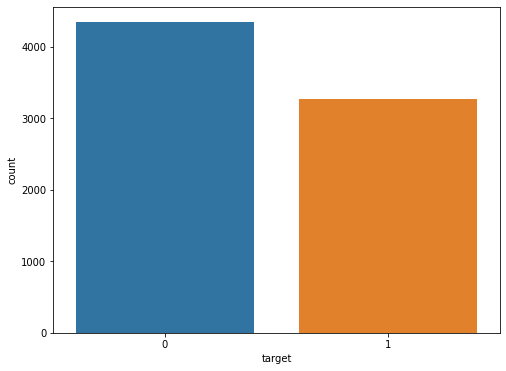

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='target',data=df_train)

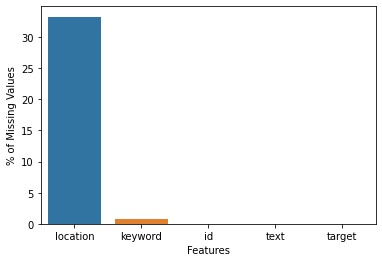

In [ ]:
miss_per = (df_train.isnull().sum()/len(df_train))*100
miss_per = miss_per.sort_values(ascending=False)

sns.barplot(x=miss_per.index, y=miss_per,data=df_train['location'])
plt.xlabel('Features')
plt.ylabel('% of Missing Values')
plt.show()

*Notice that we have a lot of null values for the 'location' column !* 

In [ ]:
target_tab = df_train.groupby('target').count()['text'].reset_index().sort_values(by='text',ascending=False)
target_tab

,target,text
0,0,4342
1,1,3271


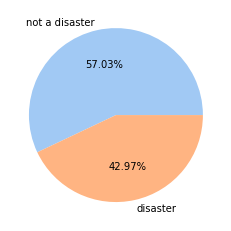

In [ ]:
disaster_tweets = df_train.groupby(['target']).count()['id'][0]
non_disaster_tweets = df_train.groupby(['target']).count()['id'][1]

data = [disaster_tweets, non_disaster_tweets]
colors = sns.color_palette('pastel')
labels = ['not a disaster', 'disaster']
plt.pie(data, colors = colors,labels=labels,autopct = '%.2f%%')
plt.show()

In [ ]:
train_demo['split_list'] = train_demo['text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in train_demo['split_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(15))
temp.columns = ['Common words','count']
temp.style.background_gradient(cmap='Blues')

,Common words,count
0,the,2575
1,a,1845
2,to,1805
3,in,1757
4,of,1722
5,and,1302
6,I,1197
7,for,820
8,is,814
9,on,773


In [ ]:
fig = px.treemap(temp, path=['Common words'], values='count',title='Most Common Words tree')
fig.show()

###**WordCloud of common words used in tweets related to a disaster**

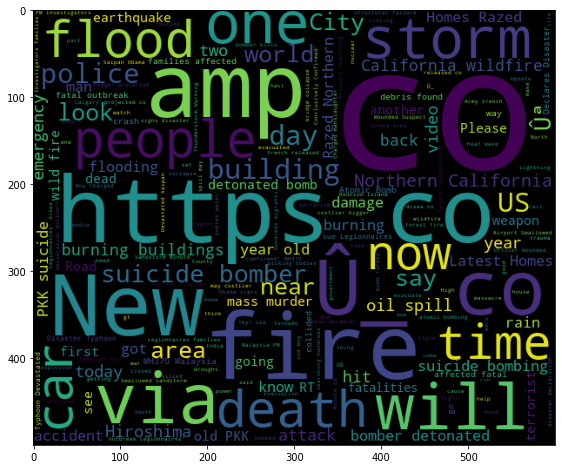

In [ ]:
word_1 = ''.join(list(df_train[df_train['target']==1]['text']))
word_1 = WordCloud(width=600, height=500).generate(word_1)
plt.figure(figsize=(11, 8))
plt.imshow(word_1)
plt.show()

###****Word cloud of common words used in tweets that unrelated to a disaster****

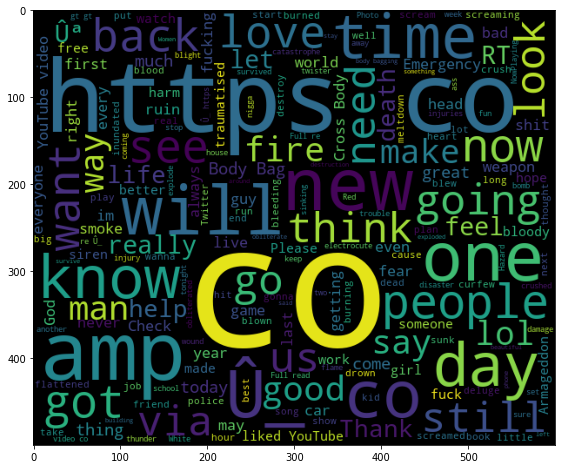

In [ ]:
word_2 = ' '.join(list(df_train[df_train['target']==0]['text']))
word_2 = WordCloud(width=600, height=500).generate(word_2)
plt.figure(figsize=(11, 8))
plt.imshow(word_2)
plt.show()

*this last ' Word Cloud ' did help us to notice some words that we should take care of during our nlp process !*

# **NLP Prepocessing :**

####**Removing : Stopwords - Url - Html - Emojis - Symboles ...:**

In [ ]:
train_demo

,id,keyword,location,text,target,split_list
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,"[Our, Deeds, are, the, Reason, of, this, #eart..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,"[Forest, fire, near, La, Ronge, Sask., Canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,"[All, residents, asked, to, 'shelter, in, plac..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"[13,000, people, receive, #wildfires, evacuati..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,"[Just, got, sent, this, photo, from, Ruby, #Al..."
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,"[Two, giant, cranes, holding, a, bridge, colla..."
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,"[@aria_ahrary, @TheTawniest, The, out, of, con..."
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,"[M1.94, [01:04, UTC]?5km, S, of, Volcano, Hawa..."
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,"[Police, investigating, after, an, e-bike, col..."


In [ ]:
transformer_regex = train_demo.replace(regex={
    ' AFAIK ':'As Far As I Know',
    ' AFK ':' Away From Keyboard ',
    ' ASAP ':' As Soon As Possible ',
    ' ATK ':' At The Keyboard ',
    ' ATM ':' At The Moment ',
    ' A3 ':' Anytime, Anywhere, Anyplace ',
    ' BAK ':' Back At Keyboard ',
    ' BBL ':' Be Back Later ',
    ' BBS ':' Be Back Soon ',
    ' BFN ':' Bye For Now ',
    ' B4N ':' Bye For Now ',
    ' BRB ':' Be Right Back ',
    ' BRT ':' Be Right There ',
    ' BTW ':' By The Way ',
    ' B4 ':' Before ',
    ' B4N ':' Bye For Now ',
    ' CU ':' See You ',
    ' CUL8R ':' See You Later ',
    ' CYA ':' See You ',
    ' FAQ ':' Frequently Asked Questions ',
    ' FC ':' Fingers Crossed ',
    ' FWIW ':" For What It's Worth ",
    ' FYI ':' For Your Information ',
    ' GAL ':' Get A Life ',
    ' GG ':' Good Game ',
    ' GN ':' Good Night ',
    ' GMTA ':' Great Minds Think Alike ',
    ' GR8 ':" Great! ",
    ' G9 ':" Genius ",
    ' IC ':" I See ",
    ' ICQ ':" I Seek you ",
    ' ILU ':" I Love You ",
    ' IMHO ':" In My Honest ",
    ' IMO ':" In My Opinion ",
    ' IOW ':" In Other Words ",
    ' IRL ':" In Real Life ",
    ' KISS ':" Keep It Simple, Stupid ",
    ' LDR ':" Long Distance Relationship ",
    ' LMAO ':" Laugh My Ass ",
    ' LOL ':" Laughing Out Loud ",
    ' LTNS ':" Long Time No See ",
    ' L8R ':" Later ",
    ' MTE ':" My Thoughts Exactly ",
    ' M8 ':" Mate ",
    ' NRN ':" No Reply Necessary ",
    ' OIC ':" Oh I See ",
    ' PITA ':" Pain In The Ass ",
    ' PRT ':" Party ",
    ' PRW ':" Parents Are Watching ",
    ' ROFL ':" Rolling On The Floor Laughing ",
    ' ROFLOL ':" Rolling On The Floor Laughing Out Loud ",
    ' ROTFLMAO ':" Rolling On The Floor Laughing My Ass ",
    ' SK8 ':" Skate ",
    ' STATS ':" Your sex and age ",
    ' ASL ':" Age, Sex, Location ",
    ' THX ':" Thank You ",
    ' TTFN ':" Ta-Ta For Now! ",
    ' TTYL ':" Talk To You Later ",
    ' U ':" You ",
    ' U2 ':" You Too",
    ' U4E ':" Yours For Ever ",
    ' WB ':" Welcome Back ",
    ' WTF ':" What The Fuck ",
    ' WTG ':" Way To Go! ",
    ' WUF ':" Where Are You From? ",
    ' W8 ':" Wait",},inplace=True)


In [ ]:
def remove_stopwords(text) : 
    stop = stopwords.words('english')
    return " ".join([word for word in text.split() if word not in (stop)])

In [ ]:
def remove_html(text) :
    html = re.compile(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});")
    return re.sub(html, "", text)

In [ ]:
def remove_emojis(text):
    emoji_pattern = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [ ]:
def clean_text(text) :
    
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = remove_html(text)
    text = remove_emojis(text)
    text = remove_stopwords(text)
    return text

In [ ]:
train_demo['cleaned_text'] = train_demo['text'].apply( lambda x:clean_text(x))

In [ ]:
train_demo

,id,keyword,location,text,target,split_list,cleaned_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,"[Our, Deeds, are, the, Reason, of, this, #eart...",deeds reason earthquake may allah forgive us
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,"[Forest, fire, near, La, Ronge, Sask., Canada]",forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,"[All, residents, asked, to, 'shelter, in, plac...",residents asked shelter place notified officer...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"[13,000, people, receive, #wildfires, evacuati...",people receive wildfires evacuation orders cal...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,"[Just, got, sent, this, photo, from, Ruby, #Al...",got sent photo ruby alaska smoke wildfires pou...
...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,"[Two, giant, cranes, holding, a, bridge, colla...",two giant cranes holding bridge collapse nearb...
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,"[@aria_ahrary, @TheTawniest, The, out, of, con...",ariaahrary thetawniest control wild fires cali...
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,"[M1.94, [01:04, UTC]?5km, S, of, Volcano, Hawa...",volcano hawaii
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,"[Police, investigating, after, an, e-bike, col...",police investigating ebike collided car little...


In [ ]:
# Tokenizing our cleaned text : 

train_demo['clean_text_tokenized'] = train_demo['cleaned_text'].apply(word_tokenize)

train_demo

,id,keyword,location,text,target,split_list,cleaned_text,clean_text_tokenized
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,"[Our, Deeds, are, the, Reason, of, this, #eart...",deeds reason earthquake may allah forgive us,"[deeds, reason, earthquake, may, allah, forgiv..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,"[Forest, fire, near, La, Ronge, Sask., Canada]",forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,"[All, residents, asked, to, 'shelter, in, plac...",residents asked shelter place notified officer...,"[residents, asked, shelter, place, notified, o..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"[13,000, people, receive, #wildfires, evacuati...",people receive wildfires evacuation orders cal...,"[people, receive, wildfires, evacuation, order..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,"[Just, got, sent, this, photo, from, Ruby, #Al...",got sent photo ruby alaska smoke wildfires pou...,"[got, sent, photo, ruby, alaska, smoke, wildfi..."
...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,"[Two, giant, cranes, holding, a, bridge, colla...",two giant cranes holding bridge collapse nearb...,"[two, giant, cranes, holding, bridge, collapse..."
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,"[@aria_ahrary, @TheTawniest, The, out, of, con...",ariaahrary thetawniest control wild fires cali...,"[ariaahrary, thetawniest, control, wild, fires..."
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,"[M1.94, [01:04, UTC]?5km, S, of, Volcano, Hawa...",volcano hawaii,"[volcano, hawaii]"
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,"[Police, investigating, after, an, e-bike, col...",police investigating ebike collided car little...,"[police, investigating, ebike, collided, car, ..."


In [ ]:
train_demo

,id,keyword,location,text,target,split_list,cleaned_text,clean_text_tokenized
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,"[Our, Deeds, are, the, Reason, of, this, #eart...",deeds reason earthquake may allah forgive us,"[deeds, reason, earthquake, may, allah, forgiv..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,"[Forest, fire, near, La, Ronge, Sask., Canada]",forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,"[All, residents, asked, to, 'shelter, in, plac...",residents asked shelter place notified officer...,"[residents, asked, shelter, place, notified, o..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"[13,000, people, receive, #wildfires, evacuati...",people receive wildfires evacuation orders cal...,"[people, receive, wildfires, evacuation, order..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,"[Just, got, sent, this, photo, from, Ruby, #Al...",got sent photo ruby alaska smoke wildfires pou...,"[got, sent, photo, ruby, alaska, smoke, wildfi..."
...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,"[Two, giant, cranes, holding, a, bridge, colla...",two giant cranes holding bridge collapse nearb...,"[two, giant, cranes, holding, bridge, collapse..."
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,"[@aria_ahrary, @TheTawniest, The, out, of, con...",ariaahrary thetawniest control wild fires cali...,"[ariaahrary, thetawniest, control, wild, fires..."
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,"[M1.94, [01:04, UTC]?5km, S, of, Volcano, Hawa...",volcano hawaii,"[volcano, hawaii]"
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,"[Police, investigating, after, an, e-bike, col...",police investigating ebike collided car little...,"[police, investigating, ebike, collided, car, ..."


In [ ]:
lemma = WordNetLemmatizer()
for sent in "Hello man my name is eat walks walked".split() : 
  word = lemma.lemmatize(sent)
  print(word)

Hello
man
my
name
is
eat
walk
walked


In [ ]:
for row in train_demo['clean_text_tokenized']:
  for index, word in enumerate(row):
    row[index] = lemma.lemmatize(word)
    


In [ ]:
train_demo.head(30)

,id,keyword,location,text,target,split_list,cleaned_text,clean_text_tokenized
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,"[Our, Deeds, are, the, Reason, of, this, #eart...",deeds reason earthquake may allah forgive us,"[deed, reason, earthquake, may, allah, forgive..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,"[Forest, fire, near, La, Ronge, Sask., Canada]",forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,"[All, residents, asked, to, 'shelter, in, plac...",residents asked shelter place notified officer...,"[resident, asked, shelter, place, notified, of..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"[13,000, people, receive, #wildfires, evacuati...",people receive wildfires evacuation orders cal...,"[people, receive, wildfire, evacuation, order,..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,"[Just, got, sent, this, photo, from, Ruby, #Al...",got sent photo ruby alaska smoke wildfires pou...,"[got, sent, photo, ruby, alaska, smoke, wildfi..."
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1,"[#RockyFire, Update, =>, California, Hwy., 20,...",rockyfire update california hwy closed directi...,"[rockyfire, update, california, hwy, closed, d..."
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1,"[#flood, #disaster, Heavy, rain, causes, flash...",flood disaster heavy rain causes flash floodin...,"[flood, disaster, heavy, rain, cause, flash, f..."
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1,"[I'm, on, top, of, the, hill, and, I, can, see...",im top hill see fire woods,"[im, top, hill, see, fire, wood]"
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1,"[There's, an, emergency, evacuation, happening...",theres emergency evacuation happening building...,"[there, emergency, evacuation, happening, buil..."
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1,"[I'm, afraid, that, the, tornado, is, coming, ...",im afraid tornado coming area,"[im, afraid, tornado, coming, area]"


### **Vectorization using TF-IDF**

Building vectors using TD-IDF method .

TF ( Term frequency ) :

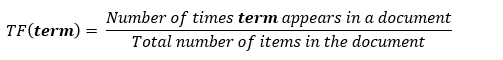

IDF ( Inverse Document Frequency ) :

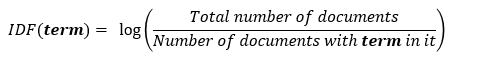

The final formula to find the TFIDF : 

image.png

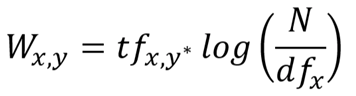

Where :

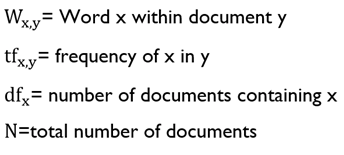

*Docs for TF-IDF : https://www.analyticsvidhya.com/blog/2021/06/part-5-step-by-step-guide-to-master-nlp-text-vectorization-approaches/#h2_10*


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
  "this burger is very tasty and affordable",
  "this burger is not tasty and is affordable",
  "this burger is very very delicious"
]

countVectorizer = CountVectorizer()

X = countVectorizer.fit_transform(corpus)

result = X.toarray()

print(result)

[[1 1 1 0 1 0 1 1 1]
 [1 1 1 0 2 1 1 1 0]
 [0 0 1 1 1 0 0 1 2]]


In [ ]:
training_df = train_demo.copy()

In [ ]:
training_df

,id,keyword,location,text,target,split_list,cleaned_text,clean_text_tokenized
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,"[Our, Deeds, are, the, Reason, of, this, #eart...",deeds reason earthquake may allah forgive us,"[deed, reason, earthquake, may, allah, forgive..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,"[Forest, fire, near, La, Ronge, Sask., Canada]",forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,"[All, residents, asked, to, 'shelter, in, plac...",residents asked shelter place notified officer...,"[resident, asked, shelter, place, notified, of..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"[13,000, people, receive, #wildfires, evacuati...",people receive wildfires evacuation orders cal...,"[people, receive, wildfire, evacuation, order,..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,"[Just, got, sent, this, photo, from, Ruby, #Al...",got sent photo ruby alaska smoke wildfires pou...,"[got, sent, photo, ruby, alaska, smoke, wildfi..."
...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,"[Two, giant, cranes, holding, a, bridge, colla...",two giant cranes holding bridge collapse nearb...,"[two, giant, crane, holding, bridge, collapse,..."
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,"[@aria_ahrary, @TheTawniest, The, out, of, con...",ariaahrary thetawniest control wild fires cali...,"[ariaahrary, thetawniest, control, wild, fire,..."
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,"[M1.94, [01:04, UTC]?5km, S, of, Volcano, Hawa...",volcano hawaii,"[volcano, hawaii]"
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,"[Police, investigating, after, an, e-bike, col...",police investigating ebike collided car little...,"[police, investigating, ebike, collided, car, ..."


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(training_df)
freq_term_matrix = count_vectorizer.transform(training_df)
tfidf = TfidfTransformer(norm = "l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)

In [ ]:
vectorizer = TfidfVectorizer(ngram_range = (1,2))
X = vectorizer.fit_transform(training_df['cleaned_text'])
target = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

In [ ]:
target['fire']

0       0.000000
1       0.155644
2       0.000000
3       0.000000
4       0.000000
          ...   
7608    0.000000
7609    0.000000
7610    0.000000
7611    0.000000
7612    0.000000
Name: fire, Length: 7613, dtype: float64

In [ ]:
top = Counter([item for sublist in training_df['clean_text_tokenized'] for item in sublist])
temp_clean = pd.DataFrame(top.most_common(30))
temp_clean.columns = ['Common words','count']
temp_clean.style.background_gradient(cmap='Blues')

,Common words,count
0,fire,348
1,like,346
2,amp,298
3,im,294
4,get,254
5,u,226
6,new,223
7,via,220
8,one,203
9,people,199


In [ ]:
training_df.shape

(7613, 8)

In [ ]:
fig = px.treemap(temp_clean, path=['Common words'], values='count',title='After finishing cleaning our texts, here is a treeMap of the most used words')
fig.show()

In [ ]:
corpus = []
for sentences in list(training_df['clean_text_tokenized']) :
    corpus.append(' '.join(sentences))
len(corpus)

7613

In [ ]:
corpus

['deed reason earthquake may allah forgive u',
 'forest fire near la ronge sask canada',
 'resident asked shelter place notified officer evacuation shelter place order expected',
 'people receive wildfire evacuation order california',
 'got sent photo ruby alaska smoke wildfire pours school',
 'rockyfire update california hwy closed direction due lake county fire cafire wildfire',
 'flood disaster heavy rain cause flash flooding street manitou colorado spring area',
 'im top hill see fire wood',
 'there emergency evacuation happening building across street',
 'im afraid tornado coming area',
 'three people died heat wave far',
 'haha south tampa getting flooded hah wait second live south tampa gon na gon na fvck flooding',
 'raining flooding florida tampabay tampa day ive lost count',
 'flood bago myanmar arrived bago',
 'damage school bus multi car crash breaking',
 'whats man',
 'love fruit',
 'summer lovely',
 'car fast',
 'goooooooaaaaaal',
 'ridiculous',
 'london cool',
 'love ski

In [ ]:
training_df['final_text'] = corpus

In [ ]:
training_df

,id,keyword,location,text,target,split_list,cleaned_text,clean_text_tokenized,final_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,"[Our, Deeds, are, the, Reason, of, this, #eart...",deeds reason earthquake may allah forgive us,"[deed, reason, earthquake, may, allah, forgive...",deed reason earthquake may allah forgive u
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,"[Forest, fire, near, La, Ronge, Sask., Canada]",forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]",forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,"[All, residents, asked, to, 'shelter, in, plac...",residents asked shelter place notified officer...,"[resident, asked, shelter, place, notified, of...",resident asked shelter place notified officer ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"[13,000, people, receive, #wildfires, evacuati...",people receive wildfires evacuation orders cal...,"[people, receive, wildfire, evacuation, order,...",people receive wildfire evacuation order calif...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,"[Just, got, sent, this, photo, from, Ruby, #Al...",got sent photo ruby alaska smoke wildfires pou...,"[got, sent, photo, ruby, alaska, smoke, wildfi...",got sent photo ruby alaska smoke wildfire pour...
...,...,...,...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,"[Two, giant, cranes, holding, a, bridge, colla...",two giant cranes holding bridge collapse nearb...,"[two, giant, crane, holding, bridge, collapse,...",two giant crane holding bridge collapse nearby...
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,"[@aria_ahrary, @TheTawniest, The, out, of, con...",ariaahrary thetawniest control wild fires cali...,"[ariaahrary, thetawniest, control, wild, fire,...",ariaahrary thetawniest control wild fire calif...
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,"[M1.94, [01:04, UTC]?5km, S, of, Volcano, Hawa...",volcano hawaii,"[volcano, hawaii]",volcano hawaii
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,"[Police, investigating, after, an, e-bike, col...",police investigating ebike collided car little...,"[police, investigating, ebike, collided, car, ...",police investigating ebike collided car little...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X = ["Good morning", "Sweet Dreams", "Stay Awake"]
Y = ["Good morning", "Sweet Dreams", "Stay Awake"]

vectorizer = TfidfVectorizer().fit(X)

tfidf_vector_X = vectorizer.transform(X).toarray()  #//shape - (3,6)
tfidf_vector_Y = vectorizer.transform(Y).toarray() #//shape - (3,6)
tfidf_vector_X = tfidf_vector_X[:, :, None] #//shape - (3,6,1) 
tfidf_vector_Y = tfidf_vector_Y[:, :, None] #//shape - (3,6,1)

# X_train, X_test, y_train, y_test = train_test_split(tfidf_vector_X, tfidf_vector_Y, test_size = 0.2, random_state = 1)


# tfidf_vector_X
# # from keras import Sequential
# # from keras.layers import LSTM

# # model = Sequential()
# # model.add(LSTM(units=6, input_shape = X_train.shape[1:], return_sequences = True))
# # model.add(LSTM(units=6, return_sequences=True))
# # model.add(LSTM(units=6, return_sequences=True))
# # model.add(LSTM(units=1, return_sequences=True, name='output'))
# # model.compile(loss='cosine_proximity', optimizer='sgd', metrics = ['accuracy'])

# # print(model.summary())



In [ ]:
VOC_SIZE = 20000

In [ ]:
one_hot_represent = [one_hot(words,VOC_SIZE)for words in training_df['final_text']]

len(one_hot_represent)

7613

**Embedding layer representation :**

In [ ]:
sent_length = 100 
embedded_docs = pad_sequences(one_hot_represent,padding='pre',maxlen=sent_length)

print(embedded_docs)

[[    0     0     0 ... 13707 11950 17944]
 [    0     0     0 ...  4211  4973  4246]
 [    0     0     0 ... 14700 18819 19013]
 ...
 [    0     0     0 ...     0  5763  6114]
 [    0     0     0 ...  6101 12000 19497]
 [    0     0     0 ...  6243  8362 17666]]


**Creating the model :**

In [83]:

opt = optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)


embedding_vector_features = 50
model = Sequential()

model.add(Embedding(VOC_SIZE,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(50,return_sequences = True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(50,return_sequences = True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(50)))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer= opt ,metrics=['accuracy'])

print(model.summary())

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 100, 50)           1000000   
                                                                 
 dropout_40 (Dropout)        (None, 100, 50)           0         
                                                                 
 bidirectional_30 (Bidirecti  (None, 100, 100)         40400     
 onal)                                                           
                                                                 
 dropout_41 (Dropout)        (None, 100, 100)          0         
                                                                 
 bidirectional_31 (Bidirecti  (None, 100, 100)         60400     
 onal)                                                           
                                                                 
 dropout_42 (Dropout)        (None, 100, 100)        

In [ ]:
embedded_docs

array([[    0,     0,     0, ..., 13707, 11950, 17944],
       [    0,     0,     0, ...,  4211,  4973,  4246],
       [    0,     0,     0, ..., 14700, 18819, 19013],
       ...,
       [    0,     0,     0, ...,     0,  5763,  6114],
       [    0,     0,     0, ...,  6101, 12000, 19497],
       [    0,     0,     0, ...,  6243,  8362, 17666]], dtype=int32)

In [ ]:
y = training_df['target']

In [ ]:
X_final=np.array(embedded_docs)
y_final=np.array(y)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [84]:
# Finally Training
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs= 10,batch_size=120)

Epoch 1/10
43/43 [==============================] - 44s 773ms/step - loss: 0.6857 - accuracy: 0.5667 - val_loss: 0.6801 - val_accuracy: 0.5754
Epoch 2/10
43/43 [==============================] - 29s 684ms/step - loss: 0.6818 - accuracy: 0.5678 - val_loss: 0.6780 - val_accuracy: 0.5754
Epoch 3/10
43/43 [==============================] - 30s 701ms/step - loss: 0.6772 - accuracy: 0.5678 - val_loss: 0.6727 - val_accuracy: 0.5754
Epoch 4/10
43/43 [==============================] - 42s 994ms/step - loss: 0.6617 - accuracy: 0.5718 - val_loss: 0.6475 - val_accuracy: 0.6546
Epoch 5/10
43/43 [==============================] - 29s 686ms/step - loss: 0.5789 - accuracy: 0.7263 - val_loss: 0.5309 - val_accuracy: 0.7421
Epoch 6/10
43/43 [==============================] - 29s 683ms/step - loss: 0.4051 - accuracy: 0.8349 - val_loss: 0.4993 - val_accuracy: 0.7724
Epoch 7/10
43/43 [==============================] - 30s 696ms/step - loss: 0.3280 - accuracy: 0.8767 - val_loss: 0.5042 - val_accuracy: 0.7803

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


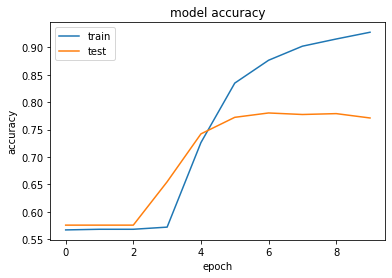

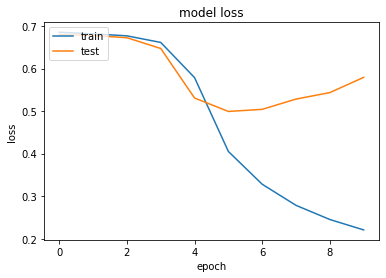

In [85]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()